In [17]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
# from sklearn import preprocessing

# from scipy import integrate  
# import scipy.signal as scipy
# from scipy.optimize import curve_fit
# from scipy.signal import find_peaks

%matplotlib widget

In [18]:
plt.close('all')

In [19]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
# palette = pld.Spectral_10_r
cmap = palette.mpl_colormap
# cmap = plt.get_cmap('rainbow')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


# Reading Solvent data

In [20]:
## Find the subfolders in the current working folder (cwd)
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Documents/20221228_DSE/CsPbBr3_ZnI2'
subfolder = glob.glob(cwd + '/**_min')
subfolder.sort()
# subfolder_Cl.reverse()
# del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Documents/20221228_DSE/CsPbBr3_ZnI2/04uL_min
/Users/chenghunglin/Documents/20221228_DSE/CsPbBr3_ZnI2/08uL_min
/Users/chenghunglin/Documents/20221228_DSE/CsPbBr3_ZnI2/16uL_min
/Users/chenghunglin/Documents/20221228_DSE/CsPbBr3_ZnI2/32uL_min
/Users/chenghunglin/Documents/20221228_DSE/CsPbBr3_ZnI2/64uL_min


In [21]:
## Reading dark and reference
# dark = glob.glob(cwd + '/dark_ref/' + 'Dark**.csv')
# ref = glob.glob(cwd + '/dark_ref/' + 'Tol_OA**.csv')

# dark_df = pd.read_csv(dark[0], skiprows=5, sep=',')
# ref_df = pd.read_csv(ref[0], skiprows=5, sep=',')

In [29]:
## Read **tth.chi into pandas dataframe

df_tth = pd.DataFrame()
df_int = pd.DataFrame()

for i in range(len(subfolder)):
    # data_files = glob.glob(subfolder[i] + '/**tth.chi')
    data_files = glob.glob(subfolder[i] + '/**.xy')
    data_files.sort()
    # del data_files[0]
    suffix = os.path.basename(subfolder[i])

    skiprows = 23 #8
    df = pd.read_csv(data_files[0], skiprows=skiprows, sep='  ', names=[f'tth_{suffix}', f'{suffix}'])
    df_tth = pd.concat([df_tth, df[f'tth_{suffix}']], axis=1, ignore_index=False)
    df_int = pd.concat([df_int, df[f'{suffix}']], axis=1, ignore_index=False)
    

/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [30]:
df

,tth_64uL_min,64uL_min
0,0.008356,306.520752
1,0.025067,306.787140
2,0.041778,306.746674
3,0.058489,308.261414
4,0.075201,309.240692
...,...,...
2919,48.788481,684.378235
2920,48.805192,489.746674
2921,48.821903,245.801239
2922,48.838614,65.583054


In [31]:
tth_step = []
for i in range(df_tth.shape[0]-1):
    tth_step.append(df_tth.iloc[i,1] - df_tth.iloc[i+1,1])

In [32]:
tth_step[:10]

[-0.016711245268000004,
 -0.016711245259999997,
 -0.01671124527,
 -0.016711245260000007,
 -0.016711245259999993,
 -0.016711245250000006,
 -0.016711245299999997,
 -0.016711245200000002,
 -0.016711245299999983,
 -0.01671124530000001]

In [33]:
df_tth.shape

(2924, 5)

In [34]:
df_tth

,tth_04uL_min,tth_08uL_min,tth_16uL_min,tth_32uL_min,tth_64uL_min
0,0.008356,0.008356,0.008356,0.008356,0.008356
1,0.025067,0.025067,0.025067,0.025067,0.025067
2,0.041778,0.041778,0.041778,0.041778,0.041778
3,0.058489,0.058489,0.058489,0.058489,0.058489
4,0.075201,0.075201,0.075201,0.075201,0.075201
...,...,...,...,...,...
2919,48.788481,48.788481,48.788481,48.788481,48.788481
2920,48.805192,48.805192,48.805192,48.805192,48.805192
2921,48.821903,48.821903,48.821903,48.821903,48.821903
2922,48.838614,48.838614,48.838614,48.838614,48.838614


In [35]:
# title = ['CsPbBr_200uL_Cl_64', 
#          'CsPbBr_200uL_Cl_32', 
#          'CsPbBr_200uL_Cl_16', 
#          'CsPbBr_200uL_Cl_08', 
#          'CsPbBr_200uL_Cl_0',
#          'CsPbBr_100uL', 
#          'CsPbBr_100uL_I_08uL', 
#          'CsPbBr_100uL_I_16uL', 
#          'CsPbBr_100uL_I_32uL', 
#          'CsPbBr_100uL_I_64uL']

title = ['04 uL/min', 
         '08 uL/min', 
         '16 uL/min', 
         '32 uL/min', 
         '64 uL/min']
         
label = title

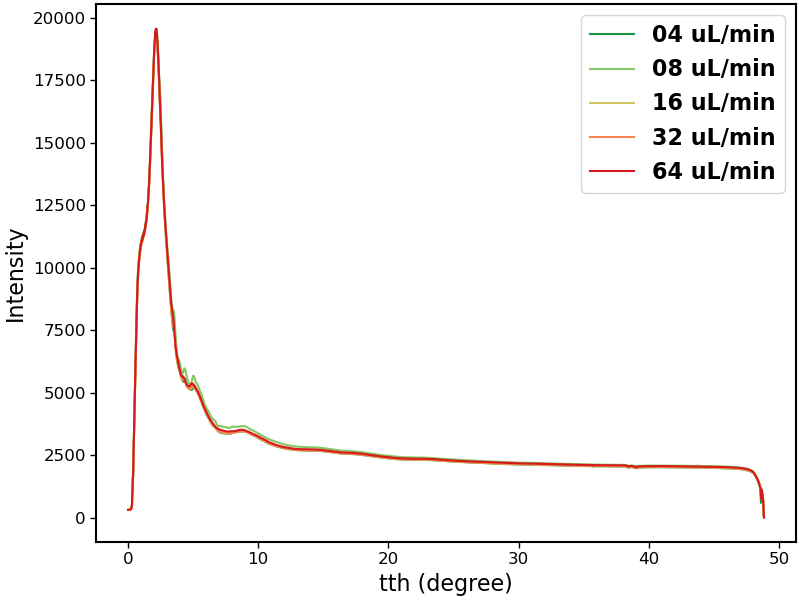

In [51]:
## Plot various exposure time data of solvent together

f1, ax1 = plt.subplots(1, 1, figsize = (8, 6), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

# mpld3.disable_notebook()
label = title
k = len(title)
color_idx = np.linspace(0, 1, k)
for i in range(len(title)):
    ax1.plot(df_tth.iloc[:,i], df_int.iloc[:,i], color=cmap(color_idx[i]), label=label[i])

legend_properties = {'weight':'bold', 'size':16}    
ax1.legend(prop=legend_properties)

# ax1.set_xlim(2.6, 11.4)
# ax1.set_ylim(2500, 9500)
ax1.set_xlabel('tth (degree)', fontsize=16, fontweight='regular')
ax1.set_ylabel('Intensity', fontsize=16, fontweight='regular')
ax1.tick_params(axis='both', direction='out', labelsize=12, size=4, width=1)
spinewidth = 1.5
ax1.spines["bottom"].set_linewidth(spinewidth)
ax1.spines["right"].set_linewidth(spinewidth)
ax1.spines["top"].set_linewidth(spinewidth)
ax1.spines["left"].set_linewidth(spinewidth)

imag_name = '20221228_ZnI2_tth_01.png'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20221127_Cl_Br_I'
# plt.savefig(cwd + '/' + imag_name, dpi = 600,  transparent=True)

In [31]:
cwd + '/' + imag_name

'/Users/chenghunglin/Documents/20221228_DSE/CsPbBr3_ZnI2/Tol_Ol_Solvent/20221228_Tol_Ol_solvent.png'